# A Simple Chess Analyzer

## Environment Setup

In [8]:
%load_ext autoreload
%autoreload 2
# Set up root path for finding package
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if root not in sys.path:
    sys.path.append(root)

from chess_assistant.fetch_games import get_player_info
from chess_assistant.accuracy_analyzer import get_accuracy_by_time_class


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Fetching the player data and store it in csv file

In [6]:
current_dir = os.getcwd()
parent_directory = os.path.dirname(current_dir)
new_folder = os.path.join(parent_directory, 'data')

try:
    os.makedirs(new_folder)
except FileExistsError:
    print("Directory already exists")
    
username = input("Enter your chess.com username: ")
player_info = get_player_info(username)
player_info.to_csv("../data/data.csv", index=False)

Directory already exists


Enter your chess.com username:  Hikaru


## Analyze Overall Match Outcomes

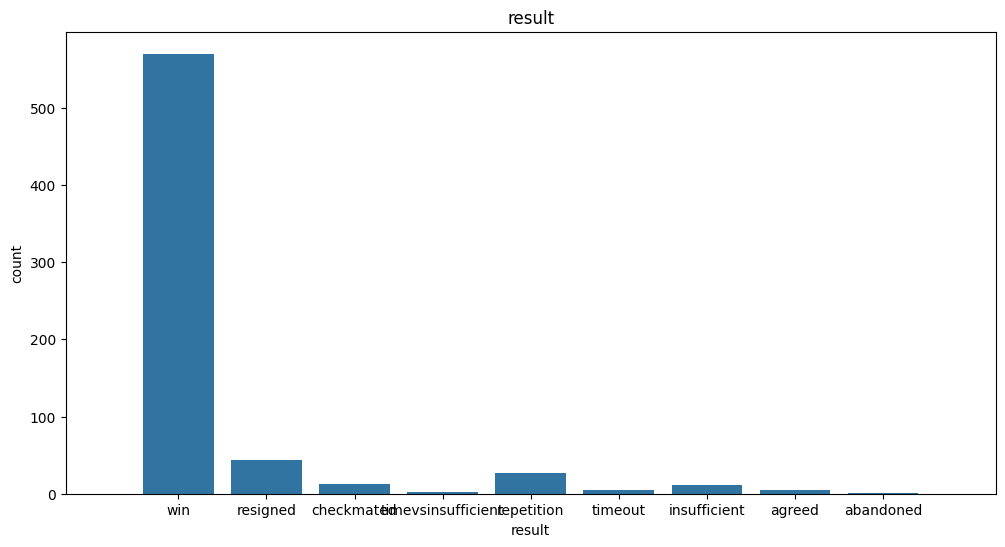

In [9]:
def win_loss_estimation(data_frame):
    plt.figure(figsize= (12, 6))
    chart = sns.countplot(data = data_frame, x = 'result')
    plt.title("result")
    plt.margins(x = 0.1)
    plt.show()

win_loss_estimation(player_info)

## Analyze Match Outcomes Based On Specific Time Class(e.g., rapid, blitz, bullet)

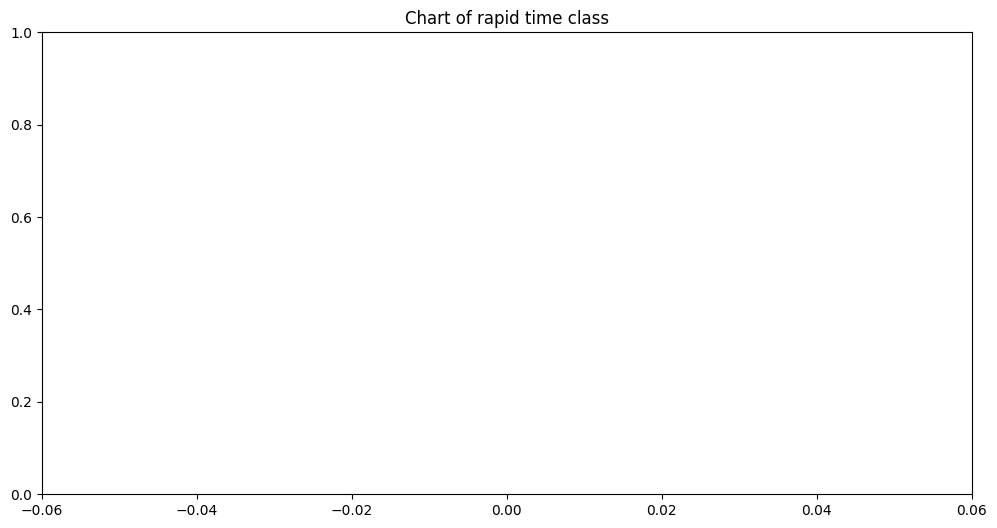

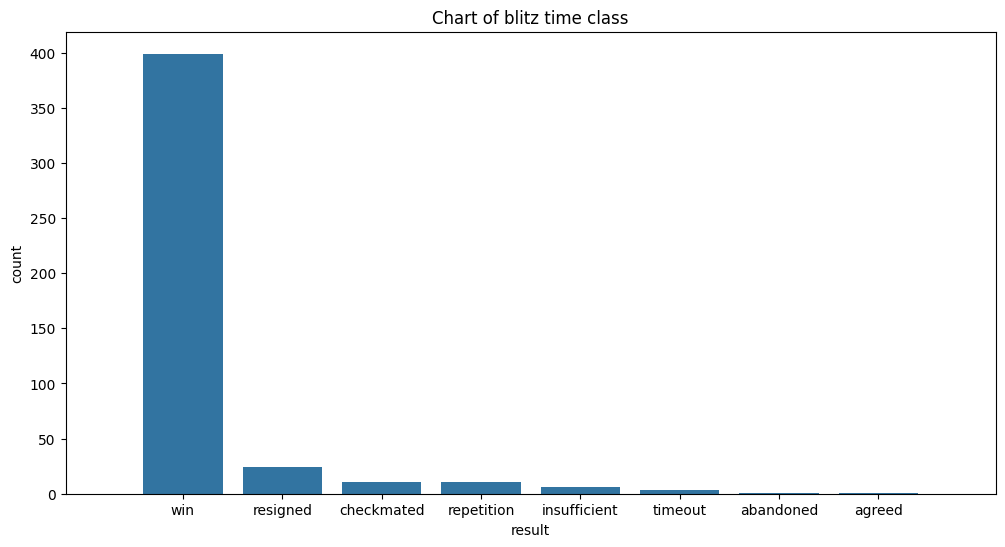

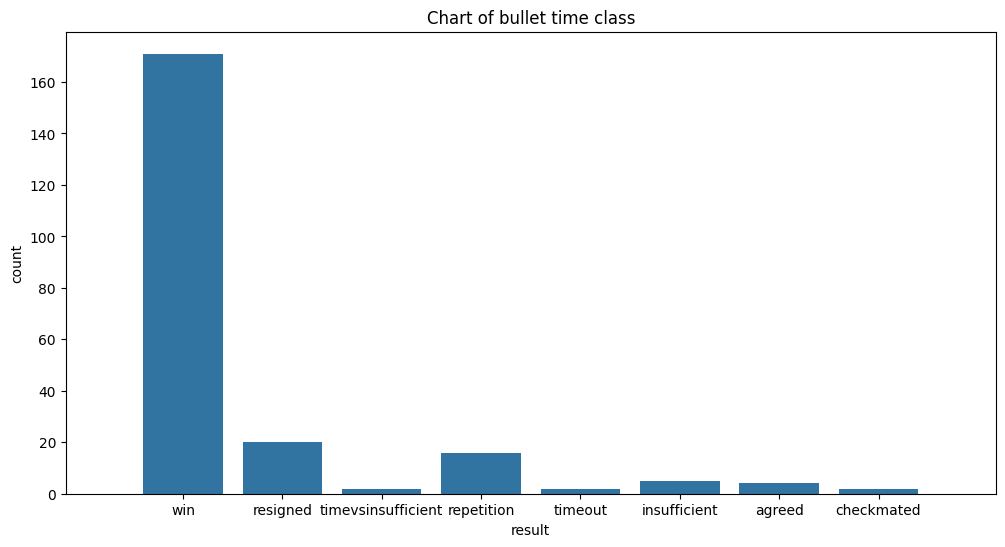

In [10]:
def analyze_match_outcomes_by_time_class(data_frame, time_class):
    result = data_frame[data_frame["time_class"] == time_class]
    plt.figure(figsize= (12, 6))
    chart = sns.countplot(data = result, x = "result")
    plt.title(f"Chart of {time_class} time class")
    plt.margins(x = 0.1)
    plt.show()

# rapid, blitz, bullet
analyze_match_outcomes_by_time_class(player_info, "rapid")
analyze_match_outcomes_by_time_class(player_info, "blitz")
analyze_match_outcomes_by_time_class(player_info, "bullet")

## Rating Progression Over Time

In [ ]:
def rating_over_time(target_username, data_frame):
    sort_values = data_frame.sort_values("end_time")
    player = data_frame[(data_frame["white"] == username) | (data_frame["black"] == username)]
    player["player_rating"] = player.apply(
        lambda row: row["white_rating"] if row["white"] == username else row["black_rating"],
        axis = 1
    )
    plt.figure(figsize = (12, 6))
    player.plot(x = "end_time", y = "player_rating", title = f"{username}'s Rating over time")
    plt.ylabel("Rating")
    plt.show()

rating_over_time(username, player_info)

## Rating Progression Over Time by Time Class(e.g., rapid, blitz, bullet)

In [ ]:
def get_player_games(dataframe, username, time_class):
    player_games = dataframe[(dataframe["white"] == username) | (dataframe["black"] == username)]
    if time_class:
         player_games = player_games[player_games["time_class"] == time_class]
    return player_games

def rating_over_time_by_time_class(target_username, dataframe, time_class):
    sort_values = dataframe.sort_values("end_time")
    player_games = get_player_games(dataframe, target_username, time_class)
    player_games["player_rating"] = player_games.apply(
        lambda row: (
            row["white_rating"] if row["white"] == username else row["black_rating"]
        ),
        axis=1,
    )
    plt.figure(figsize=(12, 6))
    player_games.plot(x="end_time", y="player_rating", title=f"{username}'s {time_class} Rating over time")
    plt.ylabel("Rating")
    plt.show()

# rapid, blitz, bullet
rating_over_time_by_time_class(username, player_info, "rapid")
rating_over_time_by_time_class(username, player_info, "blitz")
rating_over_time_by_time_class(username, player_info, "bullet")

# Performance by Time Control

In [ ]:
def performance_by_time_control(data_frame):
    plt.figure(figsize= (12, 6))
    sns.countplot(data = data_frame, x = "time_class", hue = "result")
    plt.title("Performance")
    plt.show()

performance_by_time_control(player_info)

## Strongest Opponents Defeated
#### Shows the strongest opponents that the requested player has beaten.

In [ ]:
def strongest_beaten_opponents(target_username, data_frame):
    wins = data_frame[data_frame["result"] == "win"].copy()
    wins["opponent"] = wins.apply(
        lambda row: row["black"] if row["white"] == username else row["white"],
        axis = 1
    )
    wins["opponent_rating"] = wins.apply(
        lambda row : row["black_rating"] if row["white"] == username else row["white_rating"],
        axis = 1
    )
    top_opponents = wins.sort_values(by = "opponent_rating", ascending = False).head(20)
    return top_opponents[["opponent", "opponent_rating"]]

strongest_beaten_opponents(username, player_info)

## Accuracy by Time Control
#### Displays how accurately the player performs across different game formats (e.g., bullet, blitz, rapid), helping identify where their decision-making is strongest.

In [12]:
TIME_CLASSES = ["bullet", "blitz", "rapid"]
CSV = pd.read_csv("../data/data.csv")
def show_acc_by_time_classes(target_username):
    accuracies = []
    for time_class in TIME_CLASSES:
        accuracy = get_accuracy_by_time_class(time_class, CSV, username)
        accuracies.append({
            "time_class": time_class.capitalize(),
            "accuracy": accuracy
        })
    
    df = pd.DataFrame(accuracies)
    df["accuracy"] = df["accuracy"].astype(float)
    data = df["accuracy"]

    fig = plt.figure(figsize = (8, 5))
    plt.title("Accuracy by time control")
    plt.bar(TIME_CLASSES, data, color =["#1f77b4", "#ff7f0e", "#2ca02c"])
    plt.ylabel("Accuracy (%)")
    plt.show()
    
show_acc_by_time_classes(username)

EngineTerminatedError: engine event loop dead